In [3]:
import numpy as np

# Generate a legendre basis of size `size`
def legendre_basis(size):
    basis = []
    for i in range(size):
        coeffs = np.zeros(size)
        coeffs[i] = 1
        basis.append(np.polynomial.legendre.Legendre(coeffs))
    return basis

In [27]:
# Generate the Aliasing Operator norm plot as we move each next basis function into the modeled space.

def aliasing_operator(basis_functions, sample_points, model_size: int) -> tuple[np.ndarray, float]:
    """
    Given a set of basis functions and sample points, compute the aliasing operator A and its 2-norm.
    
    Parameters:
    - basis_functions: List of callable basis functions.
    - sample_points: Array of sample points where the basis functions are evaluated.
    - model_size: Number of basis functions to consider as modeled (the rest are unmode
    led).
    """
    # M_top = [M_TM | M_TU]
    M_top_half = np.array([p(sample_points) for p in basis_functions]).T # so that rows are sample points, cols are basis functions
    
    M_TM, M_TU = M_top_half[:,:model_size], M_top_half[:,model_size:]
    M_TM_plus = np.linalg.pinv(M_TM)

    # A = M_TM^+ @ M_TU
    return (A := M_TM_plus @ M_TU), np.linalg.norm(A, ord=2).astype(float)



n=1, Uniform Norm=0.3131376296346971, Legendre Norm=0.3096123750827846
n=2, Uniform Norm=0.3856625048925736, Legendre Norm=0.3531615655637813
n=3, Uniform Norm=0.4017105745711237, Legendre Norm=0.3789411021663302
n=4, Uniform Norm=0.5060323968083066, Legendre Norm=0.3928095076572006
n=5, Uniform Norm=0.42692367962080485, Legendre Norm=0.4038813983541151
n=6, Uniform Norm=0.5271069997002285, Legendre Norm=0.4000020229609646
n=7, Uniform Norm=0.5095909825430156, Legendre Norm=0.4068328222915442
n=8, Uniform Norm=0.5795328208304898, Legendre Norm=0.4272633776466105
n=9, Uniform Norm=1.128740960526242, Legendre Norm=0.44899884951756364
n=10, Uniform Norm=0.8679330226078532, Legendre Norm=0.4314356068955761
n=11, Uniform Norm=1.6661262487759751, Legendre Norm=0.48972227567635357
n=12, Uniform Norm=1.523422833864675, Legendre Norm=0.45298547691631835
n=13, Uniform Norm=1.513372612617205, Legendre Norm=0.44634488677120876
n=14, Uniform Norm=0.9725276016815738, Legendre Norm=0.5208839156049155

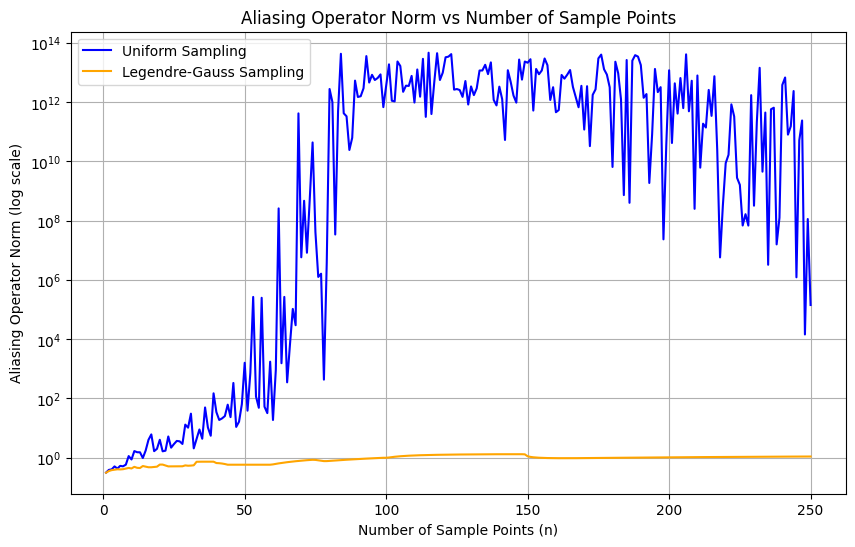

In [ ]:
import matplotlib.pyplot as plt

m = 200  # Total number of basis functions (Modeled + Unmodeled)
n = 300
complete_legendre_basis = legendre_basis(m)  # Full basis

modeled_functions = m // 2  # Pick a number of fixed modeled basis functions


norms_uniform = []
norms_legendre = []
norms_regular = []


for n in range(1, n+1):
    # Pick Uniformly random points to sample our basis at
    uniform_points = np.random.uniform(-1, 1, n)

    # Pick Legendre-Gauss points to sample our basis at
    legendre_gauss_points, _ = np.polynomial.legendre.leggauss(n)

    # Compute the aliasing operator and its norm for both sampling strategies
    A_uniform, norm_uniform = aliasing_operator(complete_legendre_basis, uniform_points, model_size=modeled_functions)
    A_legendre, norm_legendre = aliasing_operator(complete_legendre_basis, legendre_gauss_points, model_size=modeled_functions)
    A_regular, norm_regular = aliasing_operator(complete_legendre_basis, np.linspace(-1, 1, n), model_size=modeled_functions)

    norms_uniform.append(norm_uniform)
    norms_legendre.append(norm_legendre)
    norms_regular.append(norm_regular)
    print(f"n={n}, Uniform Norm={norm_uniform}, Legendre Norm={norm_legendre}, Regular Norm={norm_regular}")


plt.figure(figsize=(10, 6))
plt.plot(range(1, n+1), norms_uniform, label='Uniform Sampling', color='blue')
plt.plot(range(1, n+1), norms_legendre, label='Legendre-Gauss Sampling', color='orange')
plt.plot(range(1, n+1), norms_regular, label='Regular Sampling', color='green')
plt.yscale('log')
plt.xlabel('Number of Sample Points (n)')
plt.ylabel('Aliasing Operator Norm (log scale)')
plt.title('Aliasing Operator Norm vs Number of Sample Points')
plt.legend()
plt.grid(True)
# plt.show()
